In [1]:
# Standard libraries
import pathlib

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Get logs directory
runs_dir = pathlib.Path("../logs/evaluate/runs")
logs_dir = sorted(runs_dir.iterdir())[-1]

logs_dir = pathlib.Path("../logs/evaluate/runs/2024-06-24_09-49-15")

results = np.load(logs_dir / "results.npy")


print(results.shape)

(5400, 4)


In [8]:
if results[0, -1] == "N/A":
    # Get optimal errors
    optimal_errors = np.float32(np.load(
        "../logs/evaluate/runs/2024-06-24_08-26-14_reference_histo_rbot/results.npy"
    )[:, -1])
    
    results[:, -1] = optimal_errors

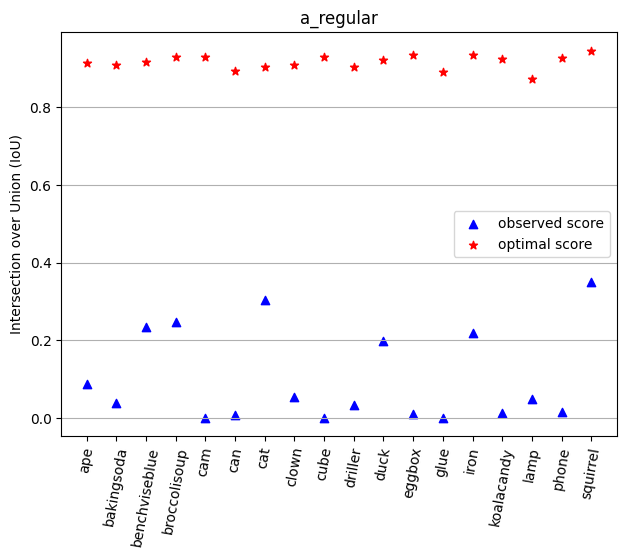

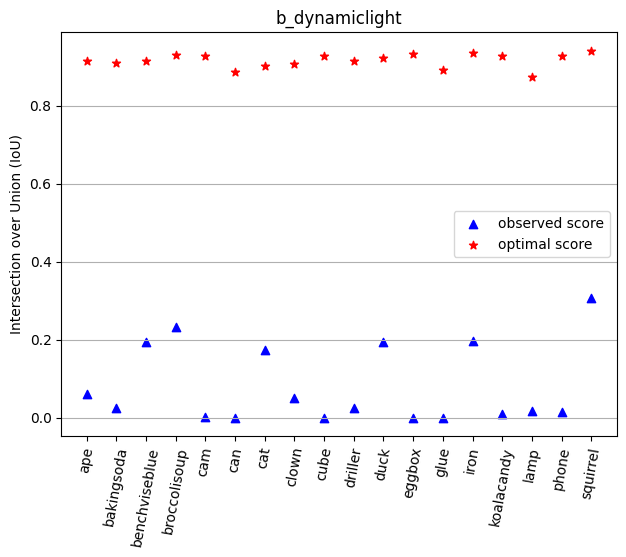

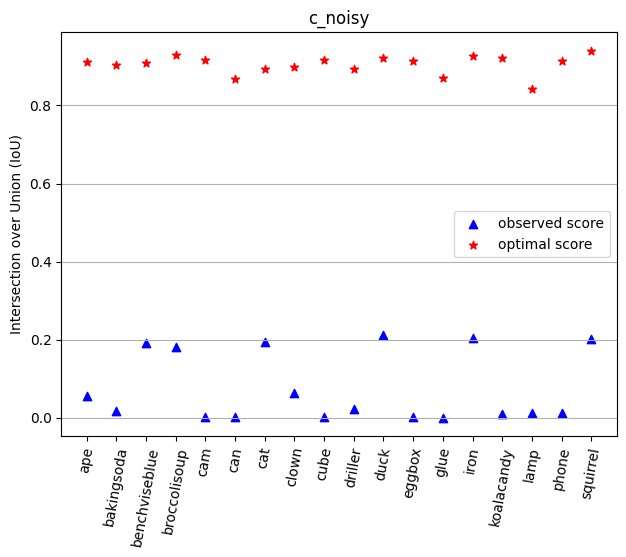

In [9]:
# Get scenes
scenes = sorted(set(results[:, 1]))

# One plot per scene
for scene in scenes:
    
    # Filter results by scene
    result_scene = results[results[:, 1] == scene]
    
    # Get models
    models = sorted(set(result_scene[:, 0]))
    
    plt.figure()
    
    errors = []
    errors_optimal = []
    
    for model in models:
        
        errors.append(
            np.mean(
                np.float32(result_scene[result_scene[:, 0] == model][:, 2])
            )
        )
        errors_optimal.append(
            np.mean(
                np.float32(result_scene[result_scene[:, 0] == model][:, 3])
            )
        )
        
    # Plot error and optimal error at abscissa model
    plt.scatter(list(models), errors, color="blue", marker="^", label="observed score")
    plt.scatter(list(models), errors_optimal, color="red", marker="*", label="optimal score")
    
    plt.ylabel("Intersection over Union (IoU)")
    plt.title(scene)
    plt.legend(loc="center right")
    plt.tight_layout()
    plt.grid(axis="y")
    
    # Rotate x-axis labels
    plt.xticks(rotation=80)